This assignment was aimed to implement a method to identify the language. I started with Exploratory Data Analysis and split data as train and test set. After I used Label Encoding to represent categorical columns in a numerical column. Following I used bag of words model to convert the text into numerical feature vectors. Finally I started training Navie Bayes, Logistic Regression, Support vector Machine, XGBClassifier, GradientBoostingClassifier and Random Forest models for classification problem.

## Exploratory Data Analysis

### Importing Modules

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

I found this data set in Kaggle. 

In [3]:
df = pd.read_csv("Language Identify.csv")

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [8]:
df.sample(10)

,Text,Language
6950,dejligt at møde dig.,Danish
2548,"[34] Em 10 de janeiro de 2001, Larry Sanger pr...",Portugeese
2386,நீங்கள் தவறாக நினைக்கிறீர்கள் என்று நினைக்கிறேன்.,Tamil
795,[19]:708–710; 755 Neural networks research had...,English
938,An artificial neuron that receives a signal ca...,English
6897,"Jeg kan ikke tro det, du skal være en sjov på ...",Danish
4134,je ne suis pas libre de le dire.,French
4197,je ne peux pas vous remercier assez.,French
8180,planlar yapmak.,Turkish
9634,"und dann mach weiter und erkläre, wo du hingek...",German


In [9]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Data set contains text details for 17 different languages.

### Missing Value Detection

In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [13]:
df.duplicated().value_counts()

False    10271
True        66
dtype: int64

This data set is small data set. I will not drop duplicated value.

## Preprocessing

### Dependet and Independet Variables

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:Here, Dataset is broken into two parts in ratio of 80:20. It means 80% data will used for model training and 20% for model testing.

In [44]:
X = df["Text"]
y = df["Language"]

Target (output, dependent) and independent variables were determined.

### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. Language column's value can be represented as numerical.

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Clean_data & Text Preprocessing
It contains many unwanted symbols, so I should use text preprocessing techniques.

In [65]:
import re

def preprocessing_clean_data(text):
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    return text

In [47]:
data_list = [(lambda text : preprocessing_clean_data(text))(text) for text in X]
data_list[0:10]

[' nature  in the broadest sense  is the natural  physical  material world or universe.',
 ' nature  can refer to the phenomena of the physical world  and also to life in general.',
 'the study of nature is a large  if not the only  part of science.',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
 '[ ] the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .',
 '[ ] in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord.',
 '[ ][ ]  the concept of nature as a whole  the physical universe  is one of several expansions of the original notion [ ] it began with certain core applications of th

### Vectorization

A numerical feature vector was created.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

X.shape

(10337, 39404)

### Split Data

Data is split as train and test with train_test_split. Test 20%, Train 80%. 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(8269, 39404), (2068, 39404), (8269,), (2068,)]

## Model Building

The x_train, y_train datasets are trained with the following models.

* Naive Bayes classifier
* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest 
* XGBClassifier
* GradientBoostingClassifier

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV     #GridSearchCV is used to find the optimum hyperparameters.

import joblib    # to save models or accuracy


### Naive Bayes

In [50]:
model = MultinomialNB()
nb_model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [51]:
acc_NB = accuracy_score(y_test, y_pred)

acc_NB


0.9763056092843327

In [61]:
#joblib.dump(acc_NB, 'acc_NB.pkl')

### Classification Report

In [261]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

cr

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       107
           1       1.00      0.98      0.99        86
           2       1.00      0.97      0.99       109
           3       0.88      0.99      0.93       277
           4       0.99      0.99      0.99       203
           5       1.00      0.98      0.99        94
           6       1.00      0.97      0.99        73
           7       1.00      1.00      1.00        12
           8       1.00      0.98      0.99       140
           9       1.00      0.95      0.97        74
          10       0.98      0.99      0.98       119
          11       1.00      0.98      0.99       148
          12       1.00      0.96      0.98       138
          13       0.97      0.99      0.98       164
          14       0.99      0.98      0.99       135
          15       1.00      0.98      0.99        94
          16       1.00      0.92      0.96        95

    accuracy              

### Visualization
#### Confusion Matrix & Yellow Blick 

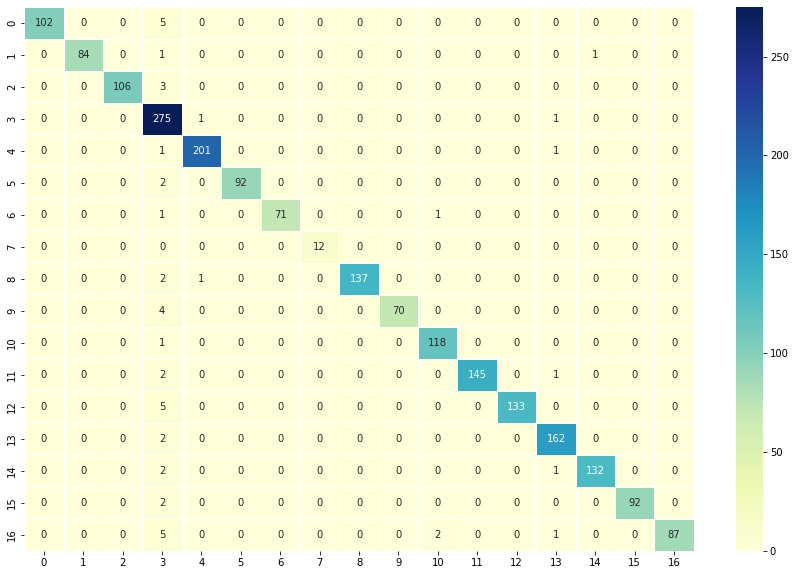

In [262]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.show()

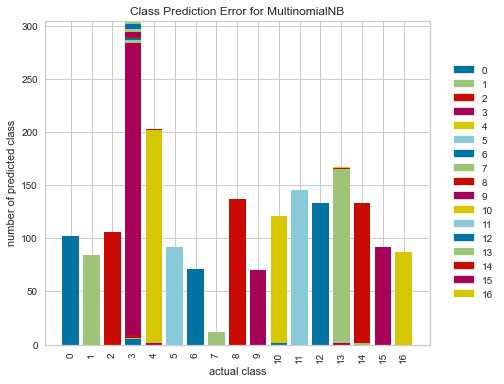

In [263]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

This grahpic shows us prediction error. Model finds texts of 0,1 ve 2 languages as %100 accuracy. There are 38 errors for 300 texts of 3 language.

### Logistic Regression

In [18]:
logmodel_count = LogisticRegression(C = 10, max_iter=10000)
logmodel_count.fit(X_train, y_train)

y_pred = logmodel_count.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred)
acc_LR

0.9535783365570599

In [31]:
#joblib.dump(acc_LR, 'acc_LR.pkl')

['acc_LR.pkl']

### Visualization
#### Confusion Matrix & Yellow Blick 

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 95   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   3   0   0   0   1   2   0   0]
 [  0   1 105   0   0   0   0   0   0   2   0   0   0   0   1   0   0]
 [  0   0   0 272   0   0   0   0   1   3   0   0   0   1   0   0   0]
 [  0   0   0   1 196   0   0   0   0   4   0   1   0   1   0   0   0]
 [  0   0   0   0   0  90   0   0   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  67   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0 133   5   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2 117   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0 141   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7   0   0 131   0   0   0   0]
 [  0   0   0   1   0   0   0   0   3   3   0   0   0 157   0   0   0]
 [  0 

Accuracy for Logistic Regression model is 0.95.

### Support Vector Machine (SVM)

In [20]:
svm_count = LinearSVC(C=10).fit(X_train, y_train)
y_pred = svm_count.predict(X_test)

acc_SVM = accuracy_score(y_test, y_pred)
acc_SVM

0.9487427466150871

In [32]:
#joblib.dump(acc_SVM, 'acc_SVM.pkl')

['acc_SVM.pkl']

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy for Support Vector Machine model is 0.95.

### Random Forest 

In [22]:
rf_count = RandomForestClassifier(500, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train, y_train)
y_pred = rf_count.predict(X_test)

acc_RF = accuracy_score(y_test, y_pred)
acc_RF

0.9347195357833655

In [33]:
#joblib.dump(acc_RF, 'acc_RF.pkl')

['acc_RF.pkl']

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 93   0   0   1   0   0   0   0   0  13   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   3   0   0   0   0   2   0   0]
 [  0   0 105   0   0   0   0   0   0   2   0   0   0   1   1   0   0]
 [  0   0   0 270   0   0   0   0   1   4   0   0   0   2   0   0   0]
 [  0   0   0   2 193   0   0   0   0   6   0   1   0   1   0   0   0]
 [  0   0   0   0   0  90   0   0   0   3   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  66   0   0   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 127   8   0   0   0   4   0   0   1]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6 113   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   4   0 140   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   0 125   0   0   0   0]
 [  0   0   0   1   2   0   0   0   4   6   0   1   0 150   0   0   0]
 [  0 

Accuracy for Random Forest model is 0.93.

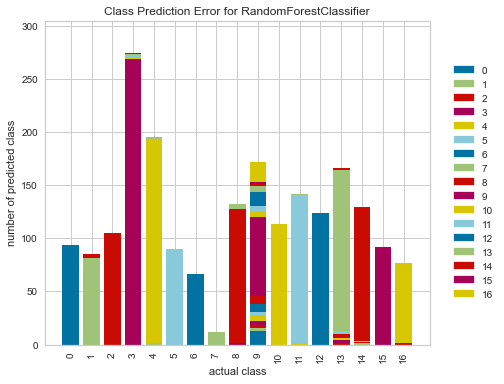

In [44]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_count)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### XGB

In [37]:
xgb_model = XGBClassifier(n_estimators=100, n_jobs=-1, verbose=2).fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
acc_XGB = accuracy_score(y_test, y_pred)
acc_XGB

[20:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9115087040618955

In [38]:
#joblib.dump(acc_XGB, 'acc_XGB.pkl')

['acc_XGB.pkl']

In [14]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> tree=None, predictor=None, random_state=None,
           reg_alpha=None, reg_lambda=None, ...)
File:        c:\users\omerk\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    le

In [14]:
xgb_params = {"n_estimators" : [100, 500, 1000],
              "subsample" : [0.6, 0.8, 1],
              "max_depth" : [3, 7, 10],
              "learning_rate" : [0.1, 0.01, 0.001]
}

xgb = XGBClassifier()

In [1]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb_tuned = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
acc_XGB = accuracy_score(y_test, y_pred)

### GBM

In [12]:
gbm_model=GradientBoostingClassifier(n_estimators=50, verbose=2).fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.8587          418.63m
         2           1.6389          316.90m
         3           1.4789          279.56m
         4           1.3581          258.71m
         5           1.2669          262.45m
         6           1.1872          266.03m
         7           1.1195          269.85m
         8           1.0596          271.97m
         9           1.0092          257.20m
        10           0.9625          244.41m
        11           0.9215          233.16m
        12           0.8850          223.01m
        13           0.8513          213.74m
        14           0.8197          205.09m
        15           0.7905          197.02m
        16           0.7629          189.33m
        17           0.7394          182.08m
        18           0.7157          175.21m
        19           0.6952          175.04m
        20           0.6762          174.03m
        21           0.6562          172.22m
        2

In [13]:
y_pred = gbm_model.predict(X_test)
acc_GBM = accuracy_score(y_test, y_pred)
acc_GBM

0.8921663442940039

In [35]:
joblib.dump(acc_GBM, 'acc_GBM.pkl')

['acc_GBM.pkl']

### CatBoost

In [11]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = 2)

y_pred = catb_model.predict(X_test)
acc_CB = accuracy_score(y_test, y_pred)
acc_CB

Learning rate set to 0.088128
0:	learn: 2.5914305	total: 1.67s	remaining: 27m 49s
2:	learn: 2.3714541	total: 4.8s	remaining: 26m 34s
4:	learn: 2.2375281	total: 8.27s	remaining: 27m 25s
6:	learn: 2.1149660	total: 11.5s	remaining: 27m 7s
8:	learn: 2.0234359	total: 14.1s	remaining: 25m 51s
10:	learn: 1.9275418	total: 16.9s	remaining: 25m 18s
12:	learn: 1.8472930	total: 19.7s	remaining: 24m 56s
14:	learn: 1.7839164	total: 22.7s	remaining: 24m 47s
16:	learn: 1.7270481	total: 25.4s	remaining: 24m 29s
18:	learn: 1.6783712	total: 28.1s	remaining: 24m 10s
20:	learn: 1.6379164	total: 31.2s	remaining: 24m 16s
22:	learn: 1.6037995	total: 34.3s	remaining: 24m 16s
24:	learn: 1.5646459	total: 37.7s	remaining: 24m 31s
26:	learn: 1.5357359	total: 40.9s	remaining: 24m 32s
28:	learn: 1.5024119	total: 44.2s	remaining: 24m 40s
30:	learn: 1.4733209	total: 47.3s	remaining: 24m 37s
32:	learn: 1.4469350	total: 50s	remaining: 24m 25s
34:	learn: 1.4262184	total: 52.9s	remaining: 24m 19s
36:	learn: 1.4045703	tota

0.8897485493230174

In [36]:
#joblib.dump(acc_CB, 'acc_CB.pkl')

NameError: name 'acc_CB' is not defined

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 87   0   0   1   0   0   0   0   0   0   0   0  19   0   0   0   0]
 [  0  74   0   0   3   0   0   0   0   0   0   0   7   1   1   0   0]
 [  0   0  99   0   0   0   0   0   0   0   0   0   8   2   0   0   0]
 [  0   0   1 256   0   0   0   0   2   0   0   0  17   0   0   0   1]
 [  0   0   2   0 181   0   0   0   1   0   0   0  14   5   0   0   0]
 [  0   0   0   1   0  80   0   0   0   0   0   1  12   0   0   0   0]
 [  0   0   0   0   0   0  57   0   0   0   0   0  16   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   2   0   0   0   0]
 [  0   0   0   2   1   0   0   0 127   0   0   0   9   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0  62   0   0  12   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 106   0  13   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 134  10   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 138   0   0   0   0]
 [  0   0   0   1   1   0   0   0   2   0   0   0   6 154   0   0   0]
 [  0 

## Conclusion

I got the best accuracy of 0.976 for Navie Bayes.

acc_NB = joblib.load("acc_NB.pkl")
acc_LR = joblib.load("acc_LR.pkl")
acc_SVM = joblib.load("acc_SVM.pkl")
acc_RF = joblib.load("acc_RF.pkl")
acc_XGB = joblib.load("acc_XGB.pkl")
acc_GBM = joblib.load("acc_GBM.pkl")

In [56]:
vs = pd.DataFrame({'models':['NB', 'Logistic', 'SVM', 'R_Forest', 'XGB','GBM'], 'acc':[acc_NB, acc_LR, acc_SVM, acc_RF, acc_XGB, acc_GBM]})
print(vs)

     models       acc
0        NB  0.976306
1  Logistic  0.953578
2       SVM  0.948743
3  R_Forest  0.934720
4       XGB  0.911509
5       GBM  0.892166


<AxesSubplot:xlabel='models'>

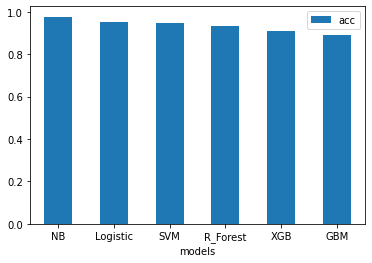

In [57]:
vs.plot.bar(x='models', y='acc', rot=0)

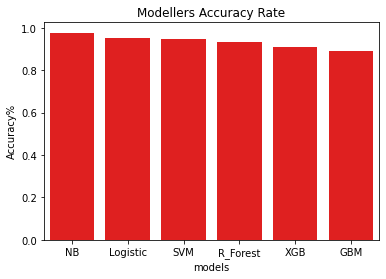

In [58]:
sns.barplot(x="models", y="acc", data=vs, color='r')
plt.ylabel('Accuracy%')
plt.title('Modellers Accuracy Rate');